# 特征缩放

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:

# 生成模拟数据
np.random.seed(42)
X = np.random.rand(100, 2) * [10, 1000]  # 特征值范围差异很大
y = 3 * X[:, 0] + 0.1 * X[:, 1] + np.random.randn(100) * 10

In [3]:
# 特征缩放前的梯度下降
def gradient_descent(X, y, alpha=0.01, epochs=1000):
    m, n = X.shape
    w = np.random.randn(n)
    b = 0
    J_history = []
    for _ in range(epochs):
        y_hat = np.dot(X, w) + b
        J = ((y - y_hat)**2).mean() / 2
        J_history.append(J)
        Jw = - X.T @ (y - y_hat) / m
        Jb = - (y - y_hat).mean()
        w -= alpha * Jw
        b -= alpha * Jb
    return w, b, J_history

In [4]:

# 特征缩放
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# 梯度下降
_, _, J_history = gradient_descent(X, y)
_, _, J_history_scaled = gradient_descent(X_scaled, y)

/tmp/ipykernel_71692/3561304065.py:9: RuntimeWarning: overflow encountered in square
  J = ((y - y_hat)**2).mean() / 2
/tmp/ipykernel_71692/3561304065.py:11: RuntimeWarning: overflow encountered in matmul
  Jw = - X.T @ (y - y_hat) / m
/tmp/ipykernel_71692/3561304065.py:11: RuntimeWarning: invalid value encountered in matmul
  Jw = - X.T @ (y - y_hat) / m
/tmp/ipykernel_71692/3561304065.py:13: RuntimeWarning: invalid value encountered in subtract
  w -= alpha * Jw


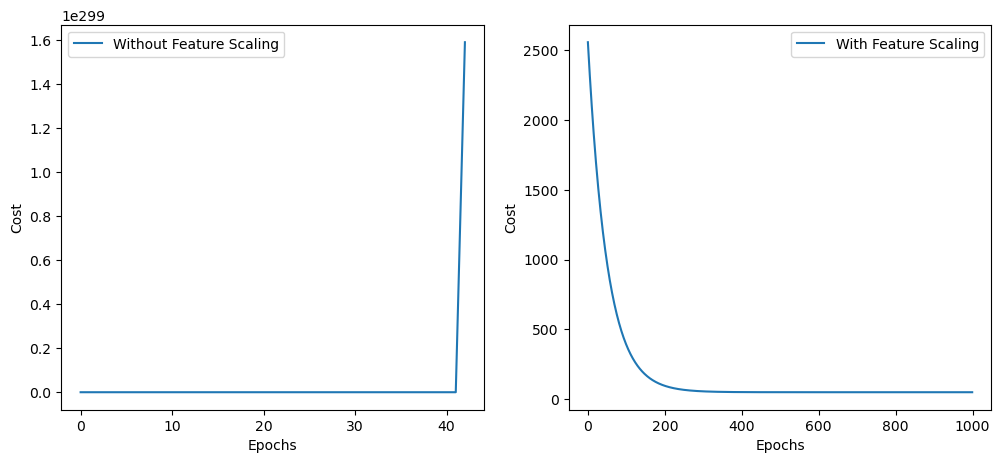

In [15]:

# 绘制代价函数下降曲线
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].plot(J_history, label='Without Feature Scaling')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Cost')
axs[1].plot(J_history_scaled, label='With Feature Scaling')
plt.xlabel('Epochs')
plt.ylabel('Cost')
for ax in axs:
    ax.legend()
plt.show()
